In [1]:

from numpy.random import seed
seed(1)
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

# Data Processing - Uses SMOTED and Scaled Data

### Read in training data

In [15]:
traindf = pd.read_csv("SMOTEData/MICHD.csv")

# Dummify the state variables
state_dummies = pd.get_dummies(traindf.STATE, prefix = "State_").iloc[:,1:]
traindf = pd.concat([traindf,state_dummies], axis = 1)
traindf.drop("STATE", axis = 1, inplace = True)

y0_train = traindf["DISEASE"] # dependent variable
X0_train = traindf.drop(['DISEASE'], axis=1) # predictors

### Read in Overall Data (as testset)

In [17]:
overalldf = pd.read_csv("OverallData/MICHD.csv")
state_dummies = pd.get_dummies(overalldf.STATE, prefix = "State_").iloc[:,1:]
overalldf = pd.concat([overalldf,state_dummies], axis = 1)
overalldf.drop("STATE", axis = 1, inplace = True)

y0_overall = overalldf["DISEASE"] # dependent variable
X0_overall = overalldf.drop(['DISEASE'], axis=1) # dependent variable

# Neural Network Compiling and Fitting

In [69]:
keras.backend.clear_session()
model0 = keras.Sequential([
    keras.layers.Dense(85, input_shape=(85,), activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model0.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.32)])

model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 85)                7310      
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 12,639
Trainable params: 12,639
Non-trainable params: 0
_________________________________________________________________


In [70]:
from numpy.random import seed
seed(1)
model0.fit(X0_train.values, y0_train.values, batch_size=16, epochs=15) # epoch = 10 for MICHD # 15 for CVDSTRK

Epoch 1/15
3432/3432 [==============================] - 3s 841us/step - loss: 0.5414 - recall: 0.9027
Epoch 2/15
3432/3432 [==============================] - 3s 852us/step - loss: 0.5128 - recall: 0.9189
Epoch 3/15
3432/3432 [==============================] - 3s 795us/step - loss: 0.5034 - recall: 0.9220
Epoch 4/15
3432/3432 [==============================] - 3s 855us/step - loss: 0.4957 - recall: 0.9227
Epoch 5/15
3432/3432 [==============================] - 3s 860us/step - loss: 0.4918 - recall: 0.9261
Epoch 6/15
3432/3432 [==============================] - 3s 870us/step - loss: 0.4894 - recall: 0.9275
Epoch 7/15
3432/3432 [==============================] - 3s 905us/step - loss: 0.4905 - recall: 0.9253
Epoch 8/15
3432/3432 [==============================] - 3s 845us/step - loss: 0.4876 - recall: 0.9291
Epoch 9/15
3432/3432 [==============================] - 3s 811us/step - loss: 0.4855 - recall: 0.9275
Epoch 10/15
3432/3432 [==============================] - 3s 798us/step - loss: 0.4

### Predict on Trainset - assess train accuracy and recall

<AxesSubplot:>

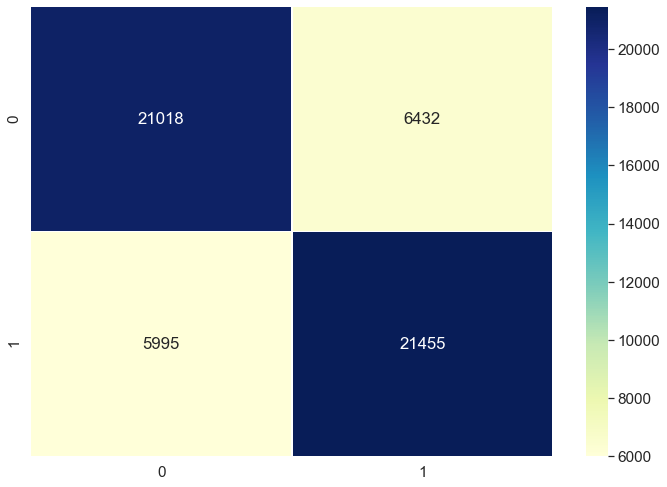

In [75]:
cm1 = confusion_matrix(y0_train, y0_trainpred)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

In [76]:
y0_trainpred = (model0.predict(X0_train.values) > 0.5).astype("int32")
print(classification_report(y0_train, y0_trainpred ))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     27450
           1       0.77      0.78      0.78     27450

    accuracy                           0.77     54900
   macro avg       0.77      0.77      0.77     54900
weighted avg       0.77      0.77      0.77     54900



### Predict on overall dataset - assess overall accuracy and recall

<ipython-input-77-0ff04cf466cd>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


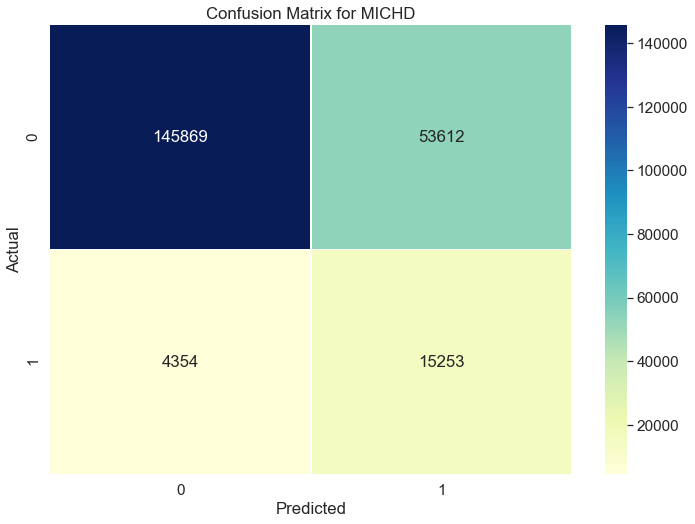

In [77]:
y0_pred = (model0.predict(X0_overall.values) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix, classification_report

cm0 = confusion_matrix(y0_overall, y0_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm0, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes() 
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Confusion Matrix for MICHD')
plt.show()

In [78]:
print(classification_report(y0_overall, y0_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83    199481
           1       0.22      0.78      0.34     19607

    accuracy                           0.74    219088
   macro avg       0.60      0.75      0.59    219088
weighted avg       0.90      0.74      0.79    219088

